In [167]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets, transforms

# 加载Fashion MNIST数据集，张量就是和numpy数组一样
transform = transforms.Compose([])
train_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)
print(train_dataset[0])
train_dataset[0][0]

(<PIL.Image.Image image mode=L size=28x28 at 0x2152D597B90>, 9)


# 加载数据并处理为tensor

In [168]:
# 加载Fashion MNIST数据集，张量就是和numpy数组一样
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.286,), (0.353,))  
])
train_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

# 获取图像和标签
# 注意：由于使用了transform，图像已经被转换为张量且标准化
# 我们需要从dataset中提取原始图像用于显示
train_images = train_dataset.data.numpy()
train_labels = train_dataset.targets.numpy()
test_images = test_dataset.data.numpy()
test_labels = test_dataset.targets.numpy()

# 定义类别名称
class_names = ['T-shirt/top', '裤子', '套头衫', '连衣裙', '外套',
               '凉鞋', '衬衫', '运动鞋', '包', '短靴']

# 查看数据集基本信息
print(f"训练集形状: {train_images.shape}")
print(f"训练集标签数量: {len(train_labels)}")
print(f"测试集形状: {test_images.shape}")
print(f"测试集标签数量: {len(test_labels)}")

print(train_images[0])

train_labels[0:20]

训练集形状: (60000, 28, 28)
训练集标签数量: 60000
测试集形状: (10000, 28, 28)
测试集标签数量: 10000
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9, 1, 0, 6, 4],
      dtype=int64)

In [169]:
def calculate_mean_std(train_dataset):
    # 首先将所有图像堆叠为一个大张量
    all_images=torch.stack([image_tensor for image_tensor,_ in train_dataset])
    print(all_images.shape)
    # 计算通道维度上的均值和标准差
    # Fashion MNIST 是灰度图像，只有一个通道
    # 对所有像素值计算均值和标准差
    mean=torch.mean(all_images)
    std=torch.std(all_images)
    print(f"训练数据集均值: {mean.item():.4f}")
    print(f"训练数据集标准差: {std.item():.4f}")

    # 检查数据集大小
    print(f"数据集中图像总数: {len(train_dataset)}")

calculate_mean_std(train_dataset)

torch.Size([60000, 1, 28, 28])
训练数据集均值: 0.0001
训练数据集标准差: 1.0001
数据集中图像总数: 60000


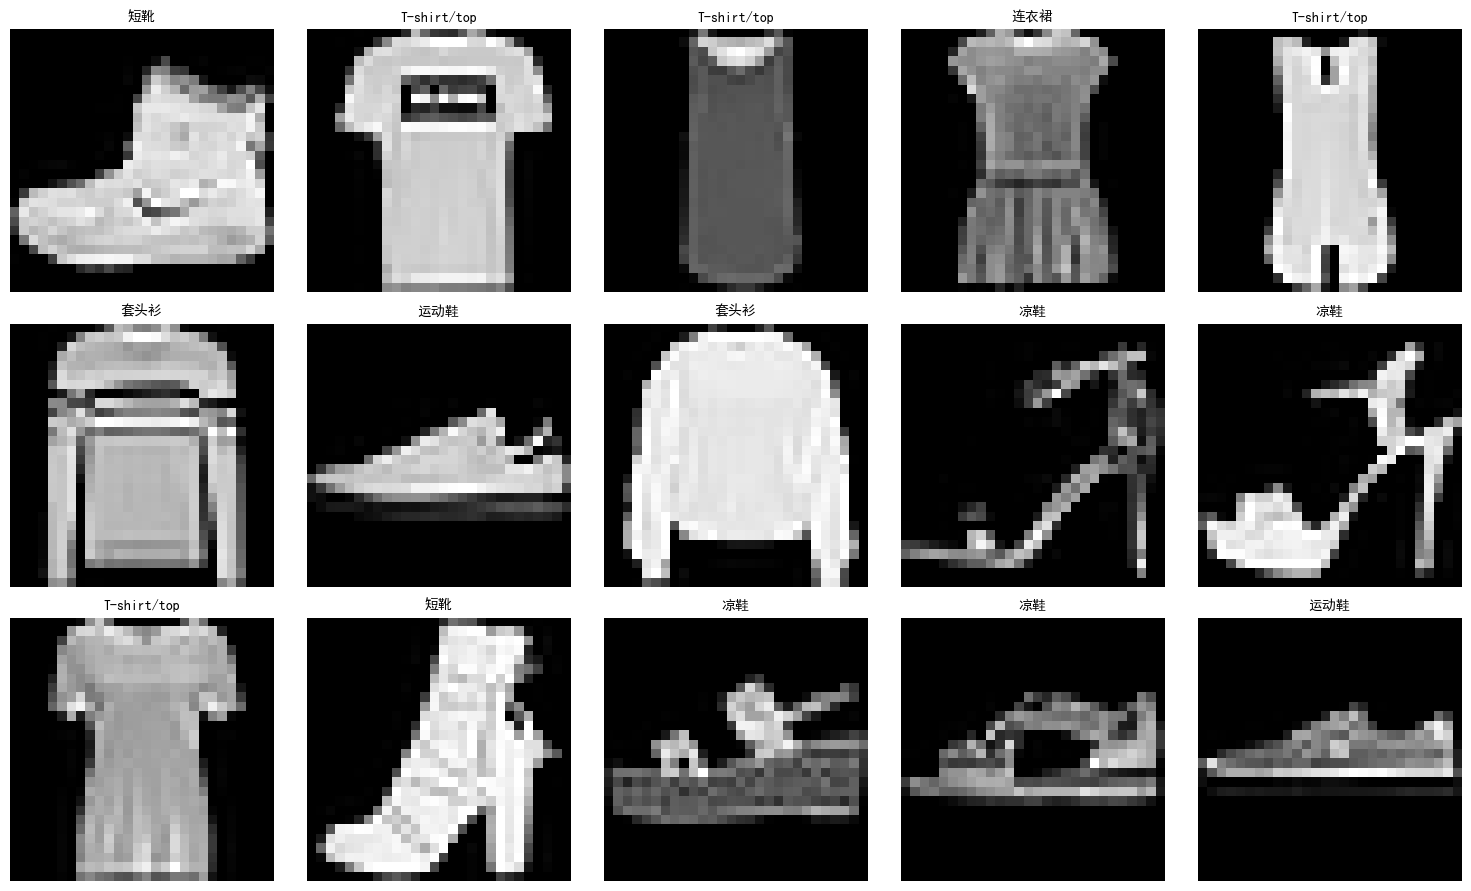

In [170]:
# 导入matplotlib用于绘图
import matplotlib.pyplot as plt
import matplotlib
# 设置中文字体，解决中文显示问题
matplotlib.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
matplotlib.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 创建一个3行5列的图表来显示前15个样本
plt.figure(figsize=(15, 9))  # 设置图表大小

# 遍历前15个样本
for i in range(15):
    # 创建子图
    plt.subplot(3, 5, i + 1)
    
    # 显示图像
    plt.imshow(train_images[i], cmap='gray')
    
    # 添加标题（显示类别名称）
    plt.title(class_names[train_labels[i]], fontsize=10)
    
    # 关闭坐标轴
    plt.axis('off')

# 调整子图之间的间距
plt.tight_layout()

# 显示图表
plt.show()

In [171]:
train_dataset[0][0].squeeze().shape

torch.Size([28, 28])

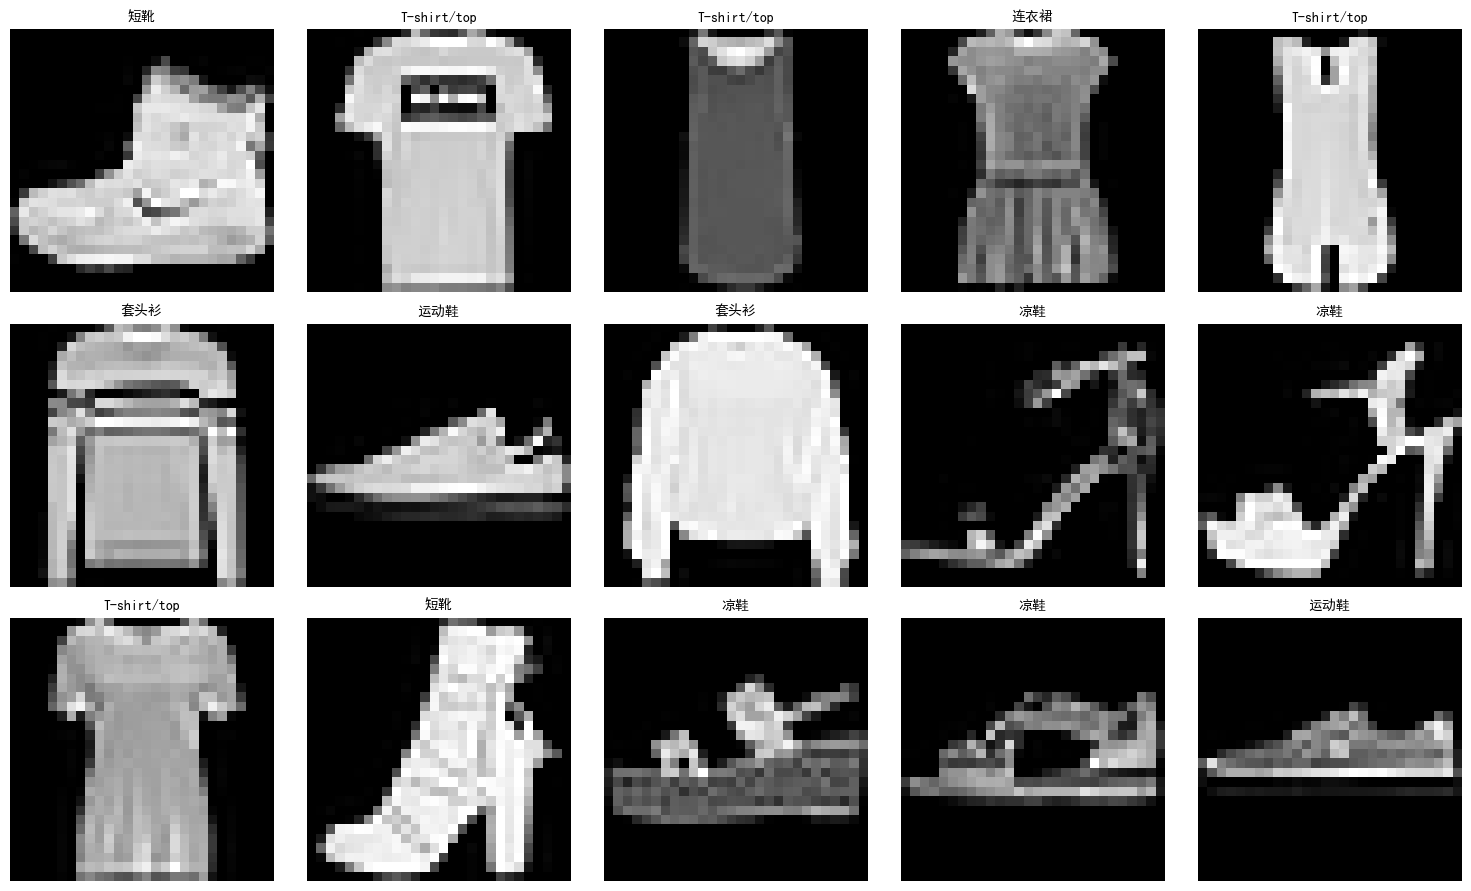

In [172]:
# 创建一个3行5列的图表来显示train_dataset中的前15个样本
plt.figure(figsize=(15, 9))  # 设置图表大小

# 遍历前15个样本
for i in range(15):
    # 获取数据和标签
    img, label = train_dataset[i]
    
    # 创建子图
    plt.subplot(3, 5, i + 1)
    
    # 将张量转换为numpy数组并显示图像,squeeze()是用来去掉张量中维度为1的维度
    plt.imshow(img.squeeze().numpy(), cmap='gray')
    
    # 添加标题（显示类别名称）
    plt.title(class_names[label], fontsize=10)
    
    # 关闭坐标轴
    plt.axis('off')

# 调整子图之间的间距
plt.tight_layout()

# 显示图表
plt.show()

# 把数据集划分为训练集55000和验证集5000，并给DataLoader

In [173]:
# 从训练集中划分出验证集
train_size = 55000
val_size = 5000
# 设置随机种子以确保每次得到相同的随机划分结果
generator = torch.Generator().manual_seed(42)
train_subset, val_subset = torch.utils.data.random_split(
    train_dataset, 
    [train_size, val_size],
    generator=generator #设置随机种子，确保每次得到相同的随机划分结果
)

# 创建数据加载器
batch_size = 64
train_loader = torch.utils.data.DataLoader(
    train_subset,
    batch_size=batch_size,
    shuffle=True #打乱数据集，每次迭代时，数据集的顺序都会被打乱
)

val_loader = torch.utils.data.DataLoader(
    val_subset,
    batch_size=batch_size,
    shuffle=False
)

test_loader = torch.utils.data.DataLoader(
    test_dataset,
    batch_size=batch_size,
    shuffle=False
)

# 打印数据集大小信息
print(f"训练集大小: {len(train_subset)}")
print(f"验证集大小: {len(val_subset)}")
print(f"测试集大小: {len(test_dataset)}")
print(f"批次大小: {batch_size}")
print(f"训练批次数: {len(train_loader)}")

训练集大小: 55000
验证集大小: 5000
测试集大小: 10000
批次大小: 64
训练批次数: 860


# 搭建模型

In [174]:
import torch.nn as nn
import torch.nn.functional as F

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        # 输入层 -> 第一隐藏层 (28*28=784 -> 300)
        self.fc1 = nn.Linear(28*28, 300)
        # 第一隐藏层 -> 第二隐藏层 (300 -> 100)
        self.fc2 = nn.Linear(300, 100)
        # 第二隐藏层 -> 输出层 (100 -> 10，对应10个数字类别)
        self.fc3 = nn.Linear(100, 10)
        
    def forward(self, x):#forward是前向传播（正向计算），x是输入
        # print("输入形状:", x.shape)
        # 将输入张量展平,view就是reshape
        x = x.view(-1, 28*28)
        # print("展平后形状:", x.shape)
        # 第一隐藏层，使用ReLU激活函数
        x = F.relu(self.fc1(x))
        # print("第一隐藏层后形状:", x.shape)
        # 第二隐藏层，使用ReLU激活函数
        x = F.relu(self.fc2(x))
        # print("第二隐藏层后形状:", x.shape)
        # 输出层，不使用激活函数（交叉熵损失函数会在内部应用softmax）
        x = self.fc3(x)
        # print("输出层形状:", x.shape)
        return x

In [175]:
# 实例化模型
model=NeuralNetwork()

# 从train_loader获取第一个批次的数据
dataiter=iter(train_loader) # iter()方法返回一个迭代器对象
images,labels=next(dataiter) # next()方法返回迭代器的下一个项目

# 查看批次数据的形状
print("批次图像形状:",images.shape)
print("批次标签形状:",labels.shape)

# 选择第一张图像进行前向传播测试,unsqueeze(0)是添加批次维度
test_image = images[0].unsqueeze(0)  # 添加批次维度
print("测试图像形状:", test_image.shape)

print('-'*100)

with torch.no_grad(): # 禁用梯度计算
    outputs=model(images)
    print("模型输出的形状:", outputs.shape)

# 获取预测结果
_, predicted = torch.max(outputs, 1) 
print("预测结果形状:", predicted.shape)
# torch.max()返回的是一个tuple，第一个元素是最大值，第二个元素是最大值的索引,
# 第二个参数表示取最大值的方向
print("模型预测结果:", predicted[0].item())
print("实际标签:", labels[0].item())

批次图像形状: torch.Size([64, 1, 28, 28])
批次标签形状: torch.Size([64])
测试图像形状: torch.Size([1, 1, 28, 28])
----------------------------------------------------------------------------------------------------
模型输出的形状: torch.Size([64, 10])
预测结果形状: torch.Size([64])
模型预测结果: 6
实际标签: 0


In [176]:
# 计算模型的总参数量
total_params = sum(p.numel() for p in model.parameters()) # numel() 返回元素数量
print(f"模型总参数量: {total_params}")

# 查看每层参数量明细
print("\n各层参数量明细:")
for name, param in model.named_parameters():
    print(f"{name}: {param.numel()} 参数")

模型总参数量: 266610

各层参数量明细:
fc1.weight: 235200 参数
fc1.bias: 300 参数
fc2.weight: 30000 参数
fc2.bias: 100 参数
fc3.weight: 1000 参数
fc3.bias: 10 参数


In [177]:
model.state_dict() # 获取模型参数

OrderedDict([('fc1.weight',
              tensor([[ 0.0247, -0.0110,  0.0039,  ..., -0.0222, -0.0153, -0.0062],
                      [ 0.0184,  0.0154,  0.0170,  ...,  0.0275, -0.0149, -0.0316],
                      [ 0.0072, -0.0059,  0.0293,  ..., -0.0017,  0.0100, -0.0249],
                      ...,
                      [ 0.0302,  0.0215, -0.0157,  ...,  0.0125,  0.0328,  0.0162],
                      [-0.0273,  0.0183, -0.0053,  ...,  0.0315,  0.0125,  0.0302],
                      [ 0.0268,  0.0077,  0.0269,  ..., -0.0127,  0.0028,  0.0073]])),
             ('fc1.bias',
              tensor([ 0.0253, -0.0205,  0.0304,  0.0185,  0.0228,  0.0263,  0.0108,  0.0260,
                       0.0192, -0.0091, -0.0026,  0.0224,  0.0226, -0.0299,  0.0193, -0.0028,
                      -0.0229, -0.0334,  0.0113, -0.0067,  0.0182,  0.0094, -0.0267, -0.0210,
                       0.0140,  0.0208,  0.0306, -0.0180,  0.0048,  0.0130,  0.0271,  0.0009,
                      -0.0331, -0.02

# 编写早停类

In [178]:
class EarlyStopping:
    """
    早停类：当验证集准确率在一定轮数内不再提高时，停止训练
    
    参数:
        patience: 容忍验证集准确率不提升的轮数
        delta: 判定准确率是否提升的阈值
        verbose: 是否打印早停信息
    """
    def __init__(self,patience=5,delta=0):
        self.patience = patience
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.delta = delta
    
    def __call__(self,val_acc):
        score = val_acc
        # 首次调用时初始化第一次得到的验证准确率
        if self.best_score is None: # 如果还没有初始化
            self.best_score = score
            return
        # 如果验证准确率没有提升
        if score<=self.best_score+self.delta:
            self.counter += 1
            if self.counter>=self.patience: #如果验证准确率没有提升的轮数大于等于容忍验证集准确率不提升的轮数，则早停
                self.early_stop = True
                print(f"早停触发! 最佳验证准确率: {self.best_score:.4f}")
        # 如果验证准确率提升了
        else:
            self.best_score = score
            self.counter = 0


# 保存模型

In [179]:
import os 
class ModelSaver:
    """
    模型保存类：根据配置保存模型权重
    
    参数:
        save_dir: 模型保存目录
        save_best_only: 是否只保存最佳模型
        verbose: 是否打印保存信息
    """
    def __init__(self,save_dir="model_weights",save_best_only=True):
        self.save_dir=save_dir
        self.save_best_only=save_best_only #是否只保存最佳模型
        self.best_score=None #最佳验证准确率

        # 确保目录存在
        if not os.path.exists(self.save_dir):
            os.makedirs(self.save_dir) #创建保存目录
    
    def __call__(self,model,epoch,val_acc):
        """
        保存模型
        
        参数:
            model: 需要保存的模型
            epoch: 当前训练轮数
            val_acc: 当前验证准确率
        """
        # 生成文件名
        filename=f'model_epoch_{epoch}_acc_{val_acc:.4f}.pth'
        save_path=os.path.join(self.save_dir,filename)

        # 是否仅保存最佳模型
        if self.save_best_only:
            # 首次调用或准确率提高时保存
            if self.best_score is None or val_acc>self.best_score:
                self.best_score=val_acc
                torch.save(model.state_dict(),save_path)

                # 删除之前的最佳模型
                for old_file in os.listdir(self.save_dir):
                    if old_file != filename and old_file.endswith('.pth'):
                        os.remove(os.path.join(self.save_dir, old_file))
        else:
            # 每个epoch都保存
            torch.save(model.state_dict(),save_path)


# 设置交叉熵损失函数，SGD优化器

In [180]:
model=NeuralNetwork()
# 定义损失函数和优化器
loss_fn = nn.CrossEntropyLoss() # 交叉熵损失函数，适用于多分类问题，里边会做softmax，还有会把0-9标签转换成one-hot编码
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3,momentum=0.9) # SGD优化器，学习率为0.01，动量为0.9
print("损失函数:",loss_fn)
print("优化器:",optimizer)

损失函数: CrossEntropyLoss()
优化器: SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    momentum: 0.9
    nesterov: False
    weight_decay: 0
)


# 编写评估函数

In [181]:
def evaluate_model(model,data_loader,device,criterion=None):
    """
    评估模型在给定数据集上的准确率和损失
    
    参数:
        model: 需要评估的模型
        data_loader: 数据加载器
        device: 计算设备(CPU/GPU)
        criterion: 损失函数（可选）
    
    返回:
        accuracy: 模型准确率
        avg_loss: 平均损失（如果提供了损失函数）
    """
    model.eval() # 将模型设置为评估模式
    correct=0 # 预测正确的样本数
    total=0 # 总样本数
    running_loss=0.0 # 累计损失

    with torch.no_grad():
        for images,labels in data_loader:
            images,labels=images.to(device),labels.to(device)
            outputs=model(images)
            _,predicted=torch.max(outputs.data,dim=1) #torch.max(outputs.data, 1)返回两个值，第一个是最大值，第二个是最大值的索引
            total+=labels.size(0) # labels.size(0)返回标签的维度，这里返回的是batch_size，因为每个批次有batch_size个标签
            correct+=(predicted==labels).sum().item() # .sum()返回的是一个张量，.item()返回张量的元素值
            
            # 如果提供了损失函数，计算损失
            if criterion is not None:
                loss=criterion(outputs,labels)
                running_loss+=loss.item()*images.size(0) #loss.item()返回损失值，images.size(0)返回每个批次的样本数量

    accuracy=100*correct/total # 计算准确率 乘以100是为了计算百分比

    # 如果计算了损失，返回平均损失
    if criterion is not None:
        avg_loss=running_loss/total
        return accuracy,avg_loss
    return accuracy

# 编写训练函数

In [182]:
def train_model(model, train_loader, val_loader, criterion, optimizer, device, num_epochs=5, early_stopping=None, model_saver=None):
    """
    训练模型函数
    
    参数:
        model: 要训练的模型
        train_loader: 训练数据加载器
        val_loader: 验证数据加载器
        criterion: 损失函数
        optimizer: 优化器
        device: 计算设备(CPU/GPU)
        num_epochs: 训练轮数
        
    返回:
        model: 训练好的模型
        history: 训练历史数据，包含每轮的损失和准确率
    """
    # 确保模型在指定设备上
    model = model.to(device)
    criterion = criterion.to(device)
    
    # 记录训练历史
    history = {
        'train_loss': [],
        'train_acc': [],
        'val_loss': [],
        'val_acc': []
    }

    # 训练循环
    for epoch in range(num_epochs):
        model.train()  # 设置为训练模式
        running_loss = torch.tensor(0.0).to(device)
        correct = torch.tensor(0).to(device)
        total = torch.tensor(0).to(device)

        # 训练一个epoch，把55000全部训练一遍
        for i, (images, labels) in enumerate(train_loader):
            images, labels = images.to(device), labels.to(device)
            # 梯度清零
            optimizer.zero_grad()
            # 前向传播
            outputs = model(images)
            loss = criterion(outputs, labels)
            # 反向传播与优化
            loss.backward()  # 反向传播，计算梯度
            optimizer.step()  # 优化器更新参数

            # 统计训练集 损失和准确率
            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            # 每100个批次打印一次信息
            if (i+1) % 100 == 0:
                print(f'轮次[{epoch+1}/{num_epochs}],批次[{i+1}/{len(train_loader)}],损失:{loss.item():.4f}', end='\r')

        # 计算当前epoch的平均损失和准确率
        epoch_train_loss = (running_loss / len(train_loader)).item()
        epoch_train_acc = 100 * (correct / total).item()
        # 使用evaluate_model函数评估验证集
        val_acc, val_loss = evaluate_model(model, val_loader, device, criterion)
        # 记录历史数据
        history['train_loss'].append(epoch_train_loss)
        history['train_acc'].append(epoch_train_acc)
        history['val_loss'].append(val_loss)
        history['val_acc'].append(val_acc)

        print(f'轮次 {epoch+1}/{num_epochs} 完成! 训练损失: {epoch_train_loss:.4f}, 训练准确率: {epoch_train_acc:.2f}%, 验证损失: {val_loss:.4f}, 验证准确率: {val_acc:.2f}%')
         # 如果有模型保存器，保存模型
        if model_saver is not None:
            model_saver(model,val_acc,epoch)
        
        # 如果有早停器，检查是否应该早停
        if early_stopping is not None:
            early_stopping(val_acc)
            if early_stopping.early_stop:
                print(f"早停: 已有{early_stopping.patience}轮验证损失没有改善！")
                break

    return model, history


In [183]:
model = NeuralNetwork()

optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)  # SGD优化器，学习率为0.01，动量为0.9

In [184]:
device=torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"当前设备: {device}")
early_stopping=EarlyStopping(patience=5, delta=0.001)
model_saver=ModelSaver(save_dir='model_weights', save_best_only=True)
model, history = train_model(model, train_loader, val_loader, loss_fn, optimizer, device, num_epochs=50,early_stopping=early_stopping, model_saver=model_saver)

当前设备: cuda:0
轮次 1/50 完成! 训练损失: 0.9269, 训练准确率: 70.25%, 验证损失: 0.5797, 验证准确率: 79.22%
轮次 2/50 完成! 训练损失: 0.5096, 训练准确率: 81.93%, 验证损失: 0.5036, 验证准确率: 82.30%
轮次 3/50 完成! 训练损失: 0.4513, 训练准确率: 83.94%, 验证损失: 0.4564, 验证准确率: 83.70%
轮次 4/50 完成! 训练损失: 0.4189, 训练准确率: 85.14%, 验证损失: 0.4303, 验证准确率: 84.78%
轮次 5/50 完成! 训练损失: 0.3965, 训练准确率: 85.94%, 验证损失: 0.4183, 验证准确率: 84.94%
轮次 6/50 完成! 训练损失: 0.3786, 训练准确率: 86.53%, 验证损失: 0.3999, 验证准确率: 85.70%
轮次 7/50 完成! 训练损失: 0.3646, 训练准确率: 87.04%, 验证损失: 0.3833, 验证准确率: 86.26%
轮次 8/50 完成! 训练损失: 0.3518, 训练准确率: 87.35%, 验证损失: 0.3856, 验证准确率: 86.28%
轮次 9/50 完成! 训练损失: 0.3404, 训练准确率: 87.81%, 验证损失: 0.3708, 验证准确率: 86.84%
轮次 10/50 完成! 训练损失: 0.3306, 训练准确率: 88.14%, 验证损失: 0.3627, 验证准确率: 87.10%
轮次 11/50 完成! 训练损失: 0.3225, 训练准确率: 88.48%, 验证损失: 0.3574, 验证准确率: 87.46%
轮次 12/50 完成! 训练损失: 0.3141, 训练准确率: 88.68%, 验证损失: 0.3489, 验证准确率: 87.60%
轮次 13/50 完成! 训练损失: 0.3064, 训练准确率: 89.02%, 验证损失: 0.3490, 验证准确率: 87.98%
轮次 14/50 完成! 训练损失: 0.2987, 训练准确率: 89.28%, 验证损失: 0.3430, 验证准确率: 87.76%
轮次 15/50 完成! 训练损

# 绘制损失曲线和准确率曲线

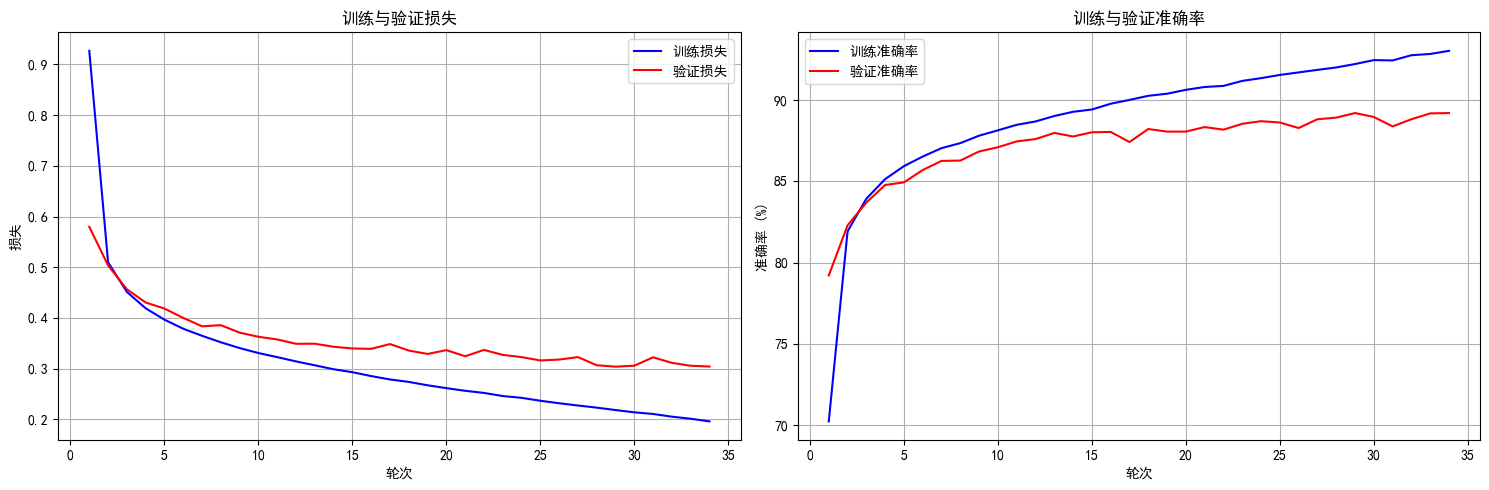

In [185]:
# 导入绘图库
import matplotlib.pyplot as plt
from matplotlib import font_manager

# 设置中文字体支持
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 创建一个图，包含两个子图（损失和准确率）
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# 绘制损失曲线
epochs = range(1, len(history['train_loss']) + 1)
ax1.plot(epochs, history['train_loss'], 'b-', label='训练损失')
ax1.plot(epochs, history['val_loss'], 'r-', label='验证损失')
ax1.set_title('训练与验证损失')
ax1.set_xlabel('轮次')
ax1.set_ylabel('损失')
ax1.legend()
ax1.grid(True)

# 绘制准确率曲线
ax2.plot(epochs, history['train_acc'], 'b-', label='训练准确率')
ax2.plot(epochs, history['val_acc'], 'r-', label='验证准确率')
ax2.set_title('训练与验证准确率')
ax2.set_xlabel('轮次')
ax2.set_ylabel('准确率 (%)')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

In [186]:
test_accuracy=evaluate_model(model,test_loader,device)
test_accuracy

88.71